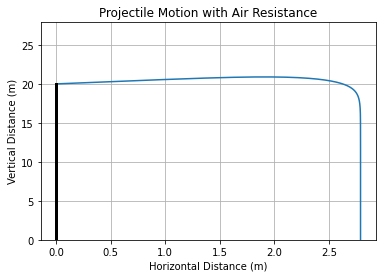

Time of flight : 7.89 seconds


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculating_Acclel(t, state, k, m):
    x, y, vx, vy = state
    v = np.sqrt(vx**2 + vy**2)
    F_air_x = -k * v * vx
    F_air_y = -k * v * vy
    ax = F_air_x / m
    ay = (F_air_y - m * g) / m
    return [vx, vy, ax, ay]

def runge_kutta_step(t, state, dt, k, m):
    k1 = calculating_Acclel(t, state, k, m)
    k2 = calculating_Acclel(t + 0.5*dt, [s + 0.5*dt*k for s, k in zip(state, k1)], k, m)
    k3 = calculating_Acclel(t + 0.5*dt, [s + 0.5*dt*k for s, k in zip(state, k2)], k, m)
    k4 = calculating_Acclel(t + dt, [s + dt*k for s, k in zip(state, k3)], k, m)
  
    return [s + dt/6 * (k1_i + 2*k2_i + 2*k3_i + k4_i) for s, k1_i, k2_i, k3_i, k4_i in zip(state, k1, k2, k3, k4)]

def projectile_motion_with_air_resistance(v0, theta, h0, k, m):
    if k==0 and theta==90:
        vx0=0
        vy0=v0
    else:
        theta = np.radians(theta)
        vx0 = v0 * np.cos(theta)
        vy0 = v0 * np.sin(theta)
    state = [0, h0, vx0, vy0]
    dt = 0.01
    times = [0]
    x_values = [0]
    y_values = [h0]
    
    while state[1] >= 0:
        t = times[-1]
        state = runge_kutta_step(t, state, dt, k, m)
        times.append(t + dt)
        x_values.append(state[0])
        y_values.append(state[1])
    
    time_of_flight = times[-1]
    
    return time_of_flight, times, x_values, y_values

g = 9.81  # Acceleration due to gravity (m/s^2)

v0 = 40   # Initial velocity (m/s)
launch_angle = 30  
initial_height = 20  
k = 1.225 # Air resistance constant (tune this value as needed, depending on the projectile and environment)
mass = 1    # mass of projecile

time_of_flight, times, x_values, y_values = \
projectile_motion_with_air_resistance(v0, launch_angle,initial_height, k, mass)

plt.plot(x_values, y_values)
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.title('Projectile Motion with Air Resistance')
plt.ylim(0,max(y_values)+7)
plt.plot([0,0],[0,initial_height],'k',linewidth=3)
plt.grid(True)
plt.show()

print(f'Time of flight : {time_of_flight:.2f} seconds')
